# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [ ]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train1, y_train1 = train['features'], train['labels']
X_valid1, y_valid1 = valid['features'], valid['labels']
X_test1, y_test1 = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train1)

# TODO: Number of testing examples.
n_valid = len(X_valid1)

# TODO: Number of testing examples.
n_test = len(X_test1)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train1[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_test1)))

print("Number of training examples =", n_train)
print("Number of validdation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validdation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

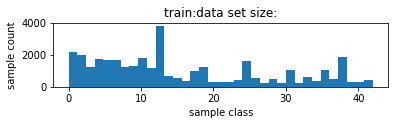

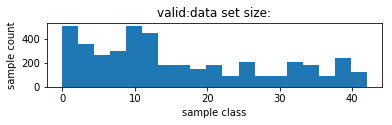

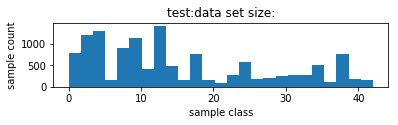

Training data set, 8 random selected images for each class
0 Speed limit (20km/h) Size: 180 Max/Min/Average: 182 76 129


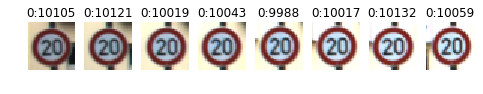

1 Speed limit (30km/h) Size: 1980 Max/Min/Average: 246 13 106


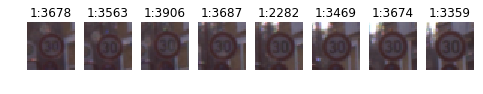

2 Speed limit (50km/h) Size: 2010 Max/Min/Average: 233 17 91


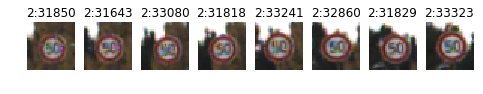

3 Speed limit (60km/h) Size: 1260 Max/Min/Average: 207 10 67


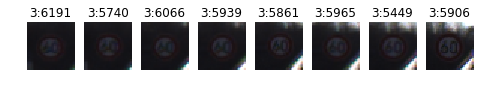

4 Speed limit (70km/h) Size: 1770 Max/Min/Average: 224 6 71


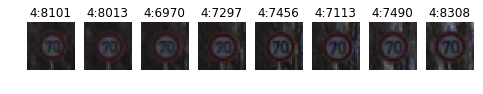

5 Speed limit (80km/h) Size: 1650 Max/Min/Average: 206 11 57


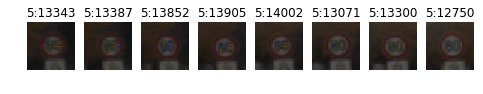

6 End of speed limit (80km/h) Size: 360 Max/Min/Average: 95 14 40


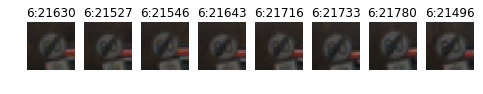

7 Speed limit (100km/h) Size: 1290 Max/Min/Average: 227 7 57


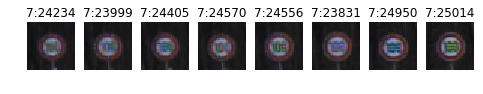

8 Speed limit (120km/h) Size: 1260 Max/Min/Average: 148 14 49


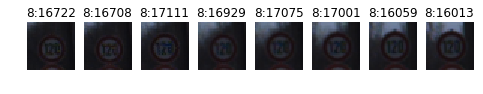

9 No passing Size: 1320 Max/Min/Average: 236 11 97


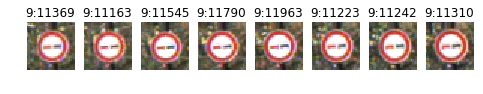

10 No passing for vehicles over 3.5 metric tons Size: 1800 Max/Min/Average: 243 7 48


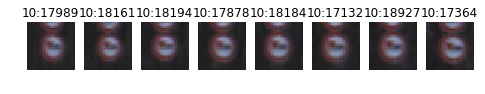

11 Right-of-way at the next intersection Size: 1170 Max/Min/Average: 248 17 89


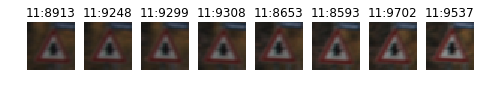

12 Priority road Size: 1890 Max/Min/Average: 234 11 87


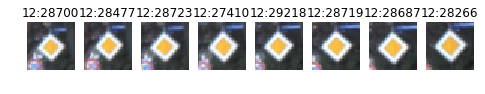

13 Yield Size: 1920 Max/Min/Average: 238 11 102


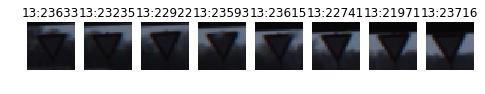

14 Stop Size: 690 Max/Min/Average: 205 19 106


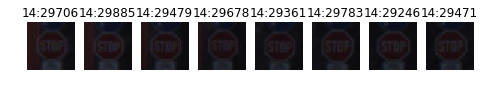

15 No vehicles Size: 540 Max/Min/Average: 216 17 98


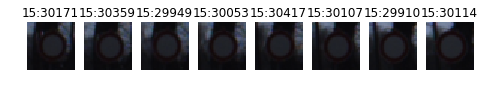

16 Vehicles over 3.5 metric tons prohibited Size: 360 Max/Min/Average: 173 15 92


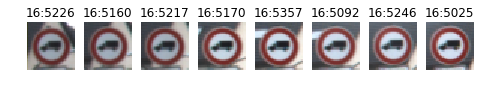

17 No entry Size: 990 Max/Min/Average: 187 10 70


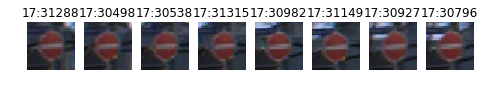

18 General caution Size: 1080 Max/Min/Average: 216 12 92


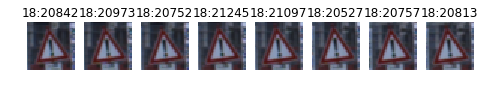

19 Dangerous curve to the left Size: 180 Max/Min/Average: 216 6 73


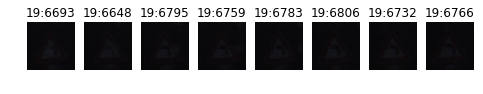

20 Dangerous curve to the right Size: 300 Max/Min/Average: 138 15 47


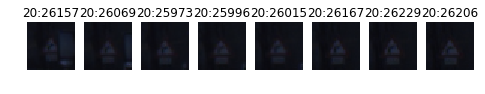

21 Double curve Size: 270 Max/Min/Average: 121 26 74


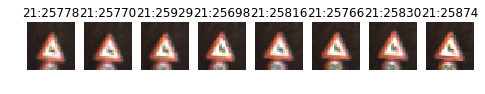

22 Bumpy road Size: 330 Max/Min/Average: 227 31 101


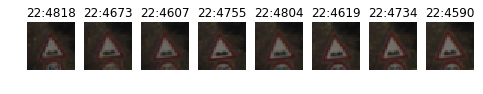

23 Slippery road Size: 450 Max/Min/Average: 200 11 77


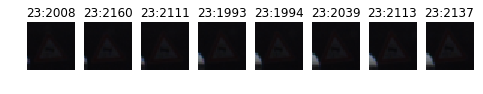

24 Road narrows on the right Size: 240 Max/Min/Average: 144 33 87


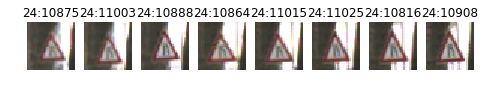

25 Road work Size: 1350 Max/Min/Average: 237 11 82


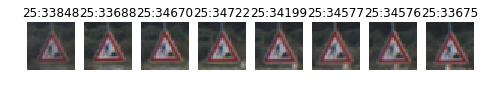

26 Traffic signals Size: 540 Max/Min/Average: 200 11 68


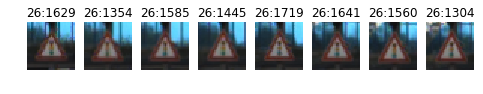

27 Pedestrians Size: 210 Max/Min/Average: 137 29 74


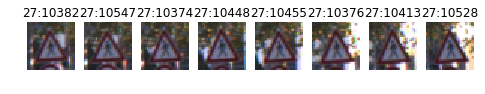

28 Children crossing Size: 480 Max/Min/Average: 221 17 92


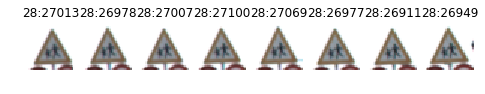

29 Bicycles crossing Size: 240 Max/Min/Average: 215 39 92


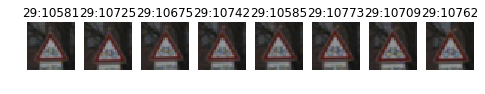

30 Beware of ice/snow Size: 390 Max/Min/Average: 213 15 75


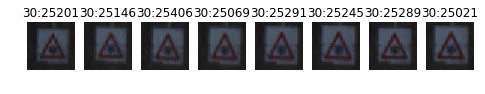

31 Wild animals crossing Size: 690 Max/Min/Average: 189 8 63


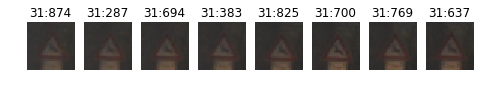

32 End of all speed and passing limits Size: 210 Max/Min/Average: 132 52 82


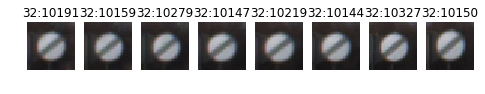

33 Turn right ahead Size: 599 Max/Min/Average: 221 10 76


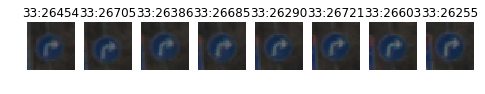

34 Turn left ahead Size: 360 Max/Min/Average: 175 20 107


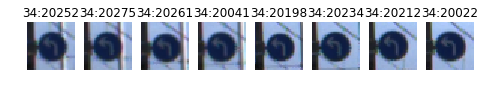

35 Ahead only Size: 1080 Max/Min/Average: 234 35 115


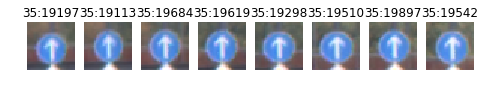

36 Go straight or right Size: 330 Max/Min/Average: 157 25 88


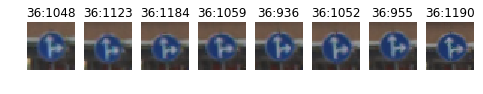

37 Go straight or left Size: 180 Max/Min/Average: 194 50 93


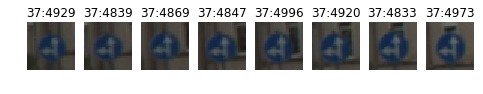

38 Keep right Size: 1860 Max/Min/Average: 225 9 78


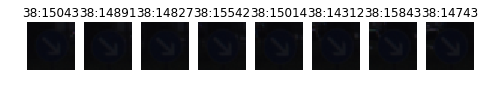

39 Keep left Size: 270 Max/Min/Average: 180 16 79


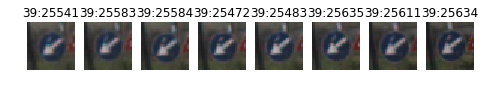

40 Roundabout mandatory Size: 300 Max/Min/Average: 198 22 93


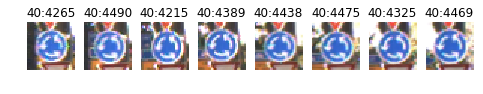

41 End of no passing Size: 210 Max/Min/Average: 191 24 101


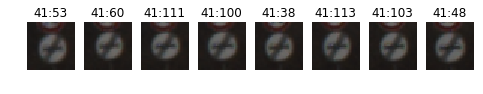

42 End of no passing by vehicles over 3.5 metric tons Size: 210 Max/Min/Average: 174 19 56


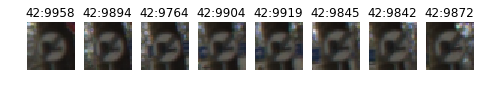

Validation data set, 8 random selected images for each class
0 Speed limit (20km/h) Size: 30 Max/Min/Average: 94 68 80


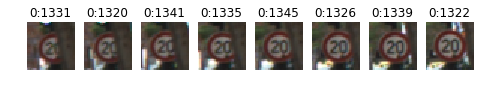

1 Speed limit (30km/h) Size: 240 Max/Min/Average: 222 30 119


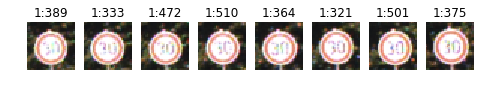

2 Speed limit (50km/h) Size: 240 Max/Min/Average: 201 27 100


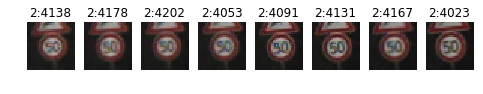

3 Speed limit (60km/h) Size: 150 Max/Min/Average: 137 27 63


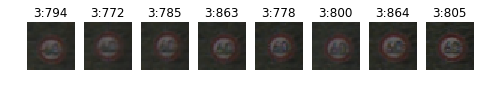

4 Speed limit (70km/h) Size: 210 Max/Min/Average: 223 9 44


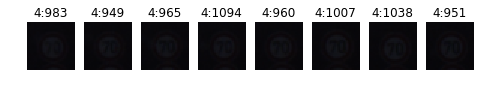

5 Speed limit (80km/h) Size: 210 Max/Min/Average: 174 25 68


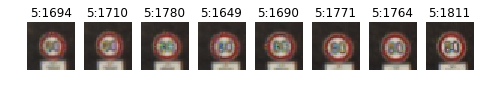

6 End of speed limit (80km/h) Size: 60 Max/Min/Average: 54 21 37


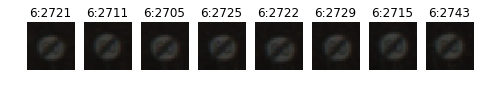

7 Speed limit (100km/h) Size: 150 Max/Min/Average: 156 19 58


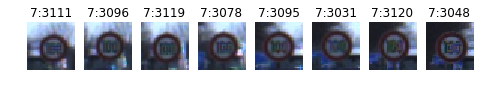

8 Speed limit (120km/h) Size: 150 Max/Min/Average: 65 9 23


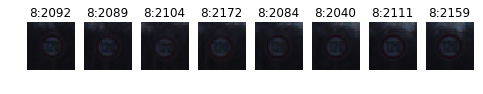

9 No passing Size: 150 Max/Min/Average: 132 21 51


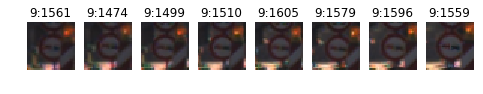

10 No passing for vehicles over 3.5 metric tons Size: 210 Max/Min/Average: 180 21 59


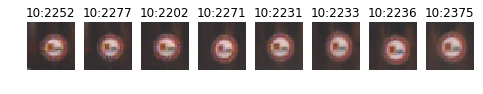

11 Right-of-way at the next intersection Size: 150 Max/Min/Average: 136 37 68


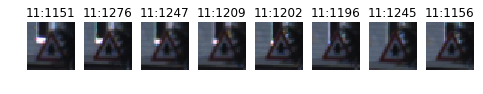

12 Priority road Size: 210 Max/Min/Average: 142 52 96


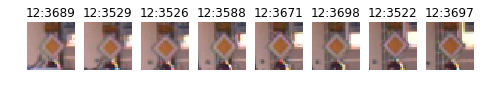

13 Yield Size: 240 Max/Min/Average: 141 12 68


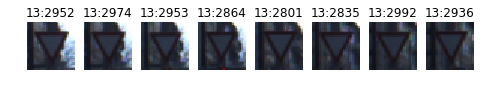

14 Stop Size: 90 Max/Min/Average: 216 41 132


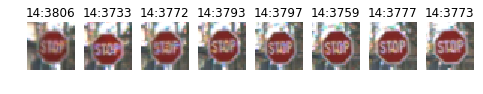

15 No vehicles Size: 90 Max/Min/Average: 221 40 111


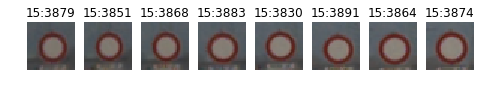

16 Vehicles over 3.5 metric tons prohibited Size: 60 Max/Min/Average: 208 77 159


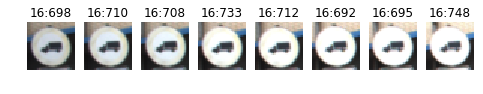

17 No entry Size: 120 Max/Min/Average: 210 68 133


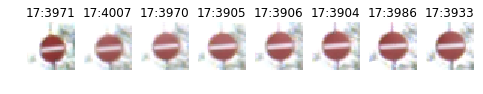

18 General caution Size: 120 Max/Min/Average: 203 22 110


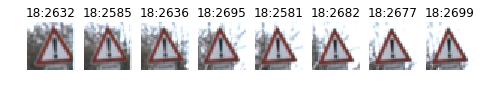

19 Dangerous curve to the left Size: 30 Max/Min/Average: 80 43 55


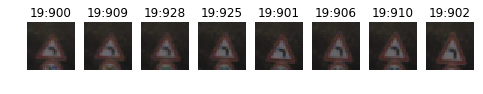

20 Dangerous curve to the right Size: 60 Max/Min/Average: 185 29 106


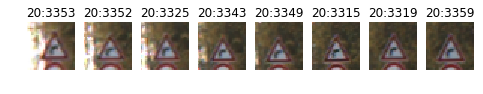

21 Double curve Size: 60 Max/Min/Average: 153 98 122


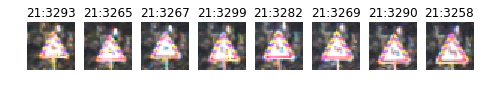

22 Bumpy road Size: 60 Max/Min/Average: 195 88 151


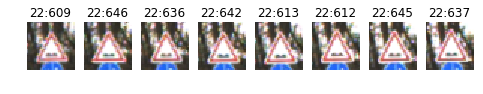

23 Slippery road Size: 60 Max/Min/Average: 205 84 115


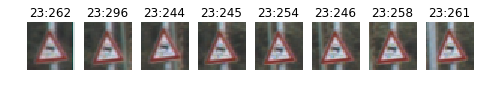

24 Road narrows on the right Size: 30 Max/Min/Average: 27 21 24


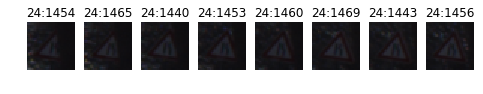

25 Road work Size: 150 Max/Min/Average: 176 34 83


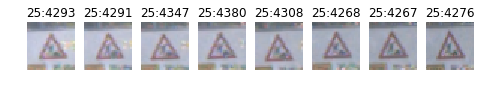

26 Traffic signals Size: 60 Max/Min/Average: 120 28 73


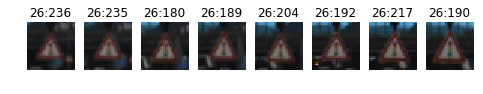

27 Pedestrians Size: 30 Max/Min/Average: 110 77 86


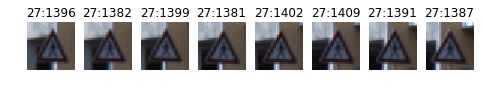

28 Children crossing Size: 60 Max/Min/Average: 233 89 154


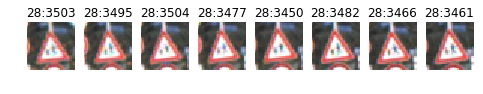

29 Bicycles crossing Size: 30 Max/Min/Average: 140 54 76


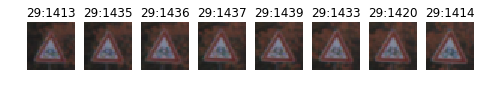

30 Beware of ice/snow Size: 60 Max/Min/Average: 68 32 45


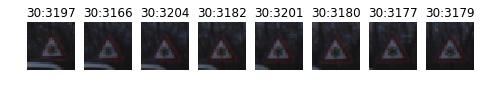

31 Wild animals crossing Size: 90 Max/Min/Average: 165 11 35


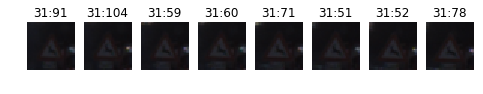

32 End of all speed and passing limits Size: 30 Max/Min/Average: 56 48 50


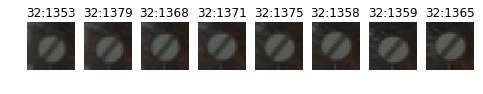

33 Turn right ahead Size: 90 Max/Min/Average: 206 28 114


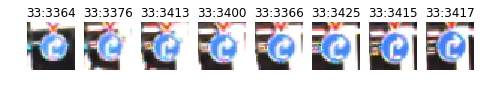

34 Turn left ahead Size: 60 Max/Min/Average: 195 97 143


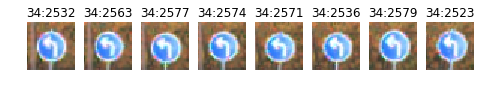

35 Ahead only Size: 120 Max/Min/Average: 173 21 85


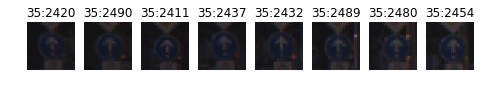

36 Go straight or right Size: 60 Max/Min/Average: 102 24 42


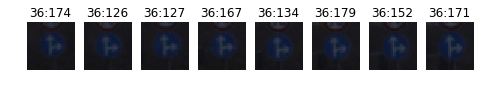

37 Go straight or left Size: 30 Max/Min/Average: 126 70 98


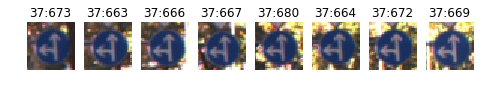

38 Keep right Size: 210 Max/Min/Average: 183 16 79


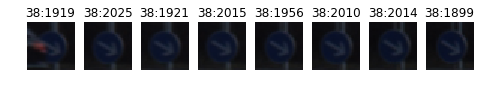

39 Keep left Size: 30 Max/Min/Average: 113 56 85


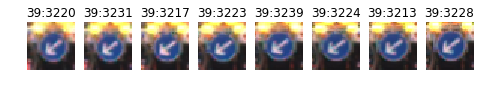

40 Roundabout mandatory Size: 60 Max/Min/Average: 202 37 93


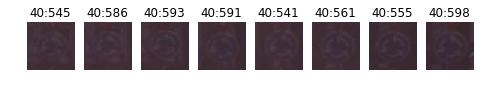

41 End of no passing Size: 30 Max/Min/Average: 33 27 30


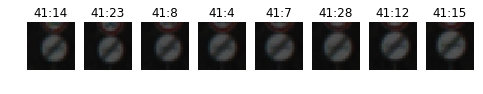

42 End of no passing by vehicles over 3.5 metric tons Size: 30 Max/Min/Average: 22 15 17


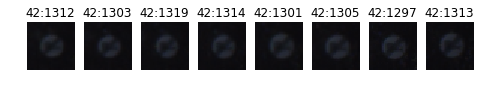

In [165]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import re
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

def get_set_num(y):
    tr_num={}
    tr_list={}
    for i in list(set(y)):
        tr_num[i]=(y==i).sum()
        a=np.argwhere(y==i)
        b=[]
        for k in a:
            for j in k:
                b.append(j)
        tr_list[i]=b
        
    return tr_num, tr_list

def get_sign_desp():
    fp=open("signnames.csv")
    lines=fp.readlines()
    #print(lines[1:])
    sign_list=[]
    for i in lines[1:]:
        #print (i)
        li=re.split(r',',i)
        sign_list.append(li[1].strip())
    return sign_list

def get_lum(x):
    if(len(x.shape)>2):
        return int(np.average(x[:,:,0]*0.3+x[:,:,1]*0.6+x[:,:,2]*0.1))
    else:
        return int(np.average(x[:,:]))

def get_one_data_set(X, y, label, index):
    tr_list=np.argwhere(y==label).flatten()
    xx=X[tr_list[index]].squeeze()
    yy=y[tr_list[index]].squeeze()
    return xx,yy

def get_data_set(X, y, label, sqz):
    tr_list=np.argwhere(y==label).flatten()
    if(sqz):
        xx=[i.squeeze() for i in X[tr_list]]
        yy=[i.squeeze() for i in y[tr_list]]
    else:
        xx=np.copy(X[tr_list])
        yy=np.copy(y[tr_list])
    return xx,yy

def get_min_max(xx):
    lum_list=[get_lum(x) for x in xx]
    max_lum=np.max(lum_list)
    min_lum=np.min(lum_list)
    return min_lum, max_lum, lum_list

def show_data_info(X, y,title,col):
    lum_min=[]
    lum_max=[]
    plt.subplot(3,1,col)
    plt.hist(y, bins="auto")
    plt.title(title+":data set size:")
    plt.ylabel("sample count")
    plt.xlabel("sample class")

    plt.show()
    if (0):
        for label in range(43):
            xx,yy=get_data_set(X,y,label,1)
            lum_min.append(get_min_max(xx)[0])
            lum_max.append(get_min_max(xx)[1])

        plt.hist2d(lum_min, lum_max) 
        plt.colorbar()
        plt.title(title+":min/max")
        plt.show()
        
# rand =0 let view the traffice of first eight track in each class
# rand =1 view randomly picked 8 images from each class
def show_sign(x,y,prefix, nrows, ncols, label, rand):
    tr_list=np.argwhere(y==label).flatten()
    if(rand):
        np.random.shuffle(tr_list)
    else:
        # German Traffic Sign Data Set has a track size of 30
        track_size=30
        tr_list=tr_list.reshape(int(len(tr_list)/track_size),track_size).T
        tr_list=tr_list.flatten()
    #print (x[tr_list])
    xx,yy=get_data_set(x,y,label,1)
    max_lum,min_lum, lum_list=get_min_max(xx)
    print (label, sign_desp[label], "Size:", len(xx), \
           "Max/Min/Average:", min_lum, max_lum, int(np.average(lum_list)))
    plt.figure(figsize=(8,6))
    for i in range(nrows):
        for j in range (ncols):
            plt.subplot(nrows,ncols,(i)*ncols+1+j)
            n=tr_list[i*ncols+j]
            m=i*ncols+j
            plt.title(str(label)+":"+str(n))
            plt.axis("off")
            if(len(xx[m].shape)>2 and xx[m].shape[2]==3):
                plt.imshow(xx[m])
                cv2.imwrite(prefix+"/class_"+str(label)+"_"+str(n)+".jpg", xx[m])
            else:
                #plt.imshow(xx[m])
                plt.imshow(np.dstack((xx[m],xx[m],xx[m])))
                cv2.imwrite(prefix+"/class_"+str(label)+"_"+str(n)+".jpg", np.dstack((xx[m],xx[m],xx[m])))
        plt.show()   

global sign_desp
# plot data set information
sign_desp=get_sign_desp()        
show_data_info(X_train1,y_train1,"train",1)
show_data_info(X_valid1,y_valid1,"valid",3)
show_data_info(X_test1,y_test1,"test",2)
# plot traffic sign images
if (1):
    print ("Training data set, 8 random selected images for each class")
    for i in range(43):
        show_sign(X_train1, y_train1, "train_ori", 1, 8, i, 1)
    print ("Validation data set, 8 random selected images for each class")
    for i in range(43):
        show_sign(X_valid1, y_valid1, "valid_ori", 1, 8, i, 1)
            

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
def color2gray(x):
    image2 = (x[:,:,0]*0.3+x[:,:,1]*0.6+x[:,:,2]*0.1)
    image = image2.astype("uint8")
    image = np.reshape(image, [32, 32, 1])
    return image

def denorm_one_img(img1):
    img1=(img1+1.0)*127.5
    img1=img1.astype("uint8")
    return img1

def denorm_image(X, use_gray, use_norm):
    if(use_norm):
        Y=(X+1)*127.5
    else:
        Y=X
    #clip to [0, 255]
    Y[:,:,:][Y[:,:,:]>255.0]  = 255
    Y[:,:,:][Y[:,:,:]<0.0]  = 0
    if(use_gray):
        Y=Y.squeeze()
        Y=np.stack((Y,Y,Y),axis=-1)
    nY=Y.astype("uint8")
    return nY

# use hist normalize to make input data zero mean
def norm_image(X, gray, norm):   
    nX=[]
    for i in range(len(X)):
        x = X[i].squeeze()
        if(gray):
            image = color2gray(x)
            image = cv2.equalizeHist(image)
            if(norm):
                image = (image/127.5-1.0)
            image = np.reshape(image, [32, 32, 1])
        else:
            image = np.copy(x)
            if(norm):
                image = (image/127.5-1.0)
            image = np.reshape(image, [32, 32, 3])
        nX.append(image)
    Y=np.array(nX)
    return Y

def augment_brightness(image):
    prob=np.random.randint(4)
    hi=aug_spec["brightness"][1]
    lo=aug_spec["brightness"][0]
    random_bright = lo+np.random.uniform()*(hi-lo)
    #random_bright = -random_bright

    if(prob==0):
        image1 = (image+1.0)*random_bright-1.0
    else:
        image1 = image*1.0
    image1[:,:][image1[:,:]>1.0]  = 1.0
    image1[:,:][image1[:,:]<-1.0]  = -1.0
    return image1

def transform_image(ori_image,ang_range,trans_range):
    pad=16
    image=cv2.copyMakeBorder(ori_image, pad,pad,pad,pad,cv2.BORDER_REPLICATE)
# Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    #ang_rot = 5
    
    rows,cols = image.shape    

# Rotation    
    sc0=aug_spec["scale"][0]
    sc1=aug_spec["scale"][1]
    sc = sc0+np.random.uniform()*(sc1-sc0)
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,sc)
# Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
     
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = image[pad:pad+32, pad:pad+32]
    return image

def flip_image(image, label):
    image=image.squeeze()
    if(label not in [0,1,2,3,4,5,6,7,8,14,19,20,24,33,34,36,37,38,39]):
        if(np.random.randint(4)==0):
            image=cv2.flip(image,1)
    image=image.reshape([32,32,1])
    return image

def augment_image(image):
    #[+/-2], 15 degree
    ang_range,trans_range = aug_spec["angle"], aug_spec["tran"]
    image=image.squeeze()
    image = augment_brightness(image)
    image = transform_image(image,ang_range,trans_range)
    image=image.reshape([32,32,1])
    return image

# show one image per each class, to view clearly use hist normalization
def show_class_images(X, y, show, name, hist=1):
    print(name, "Data Set Size,Max,Min,Mean:", len(X), np.max(X), np.min(X), np.mean(X))
    tr_num,tr_list=get_set_num(y)
    if(show==1):
        plt.figure(dpi=80,figsize=(8*2, 6*2))
        for i in range(43):
            plt.subplot(6, 8, 1+i)
            plt.axis("off")
            idx=tr_list[i][0]
            plt.title(str(i)+":"+str(int((np.max(X[idx])+1)*127.5)))
            img=denorm_image(X[idx], use_gray, use_norm)
            img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            if(hist==1):
                img=cv2.equalizeHist(img)
            plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))
        plt.show()

def add_aug_images(X_train, y_train, number):
    X_train_list=X_train.tolist()
    y_train_list=y_train.tolist()
    tr_num,tr_list=get_set_num(y_train)
    for i in tr_num.keys():
        num=max(0,number-tr_num[i])
        if(num>0):
            print ("Add %d samples for %d %s class"%(num, i, sign_desp[i]))           
        for j in range(num):
            idx=tr_list[i][j%tr_num[i]]
            img1=X_train[idx]
            img2=augment_image(img1)
            img2=flip_image(img2,y_train[idx])
            X_train_list.append(img2)
            y_train_list.append(i)
    X_train=np.array(X_train_list,dtype="float64")
    y_train=np.array(y_train_list,dtype="float64")
    return X_train, y_train, tr_num

def show_aug_images(X_train, y_train):
    for label in range(43):
        tr_list=np.argwhere(label==y_train).flatten()
        img1=X_train[tr_list[0]]
        yy=y_train[tr_list[0]]    
        print(label, get_sign_desp()[label], img1.shape,img1.dtype)
        plt.figure(dpi=80,figsize=(8*2, 6*2))
        plt.subplot(1,8,1)
        plt.imshow(denorm_one_img(img1.squeeze()), cmap="gray")
        for i in range(7):
            plt.subplot(1,8,i+2)
            plt.axis("off")
            img2=augment_image(img1)
            img2=flip_image(img2, label)
            plt.imshow(denorm_one_img(img2.squeeze()), cmap="gray")
        plt.show()

def gen_new_batch(X,y, aug_size):
    nX=[]
    ny=[]
    for i in range(len(X)):
        for k in range(aug_size):
            if(k>0):
                img1=augment_image(X[i])
                img1=flip_image(img1,y[i])
            else:
                img1=np.copy(X[i])
            nX.append(img1)
            ny.append(y[i])
    return nX, ny
        

In [49]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
use_gray=1
use_norm=1
aug_spec={"brightness":[0.9,1.1],
         "angle":5,
         "tran":4,
         "scale":[0.75,1.5]}

if(use_gray):
    input_depth=1
else:
    input_depth=3

X_train2=norm_image(X_train1,use_gray, use_norm)    
y_train2=np.copy(y_train1)

X_valid=norm_image(X_valid1,use_gray, use_norm)    
X_test=norm_image(X_test1,use_gray, use_norm)    
y_valid=np.copy(y_valid1)
y_test=np.copy(y_test1)

show_class_images(X_train2, y_train2, 0, name="Train", hist=0)
show_class_images(X_valid, y_valid, 0, name="Valid", hist=0)
show_class_images(X_test, y_test, 0, name="Test", hist=0)



Train Data Set Size,Max,Min,Mean: 34799 1.0 -1.0 0.0292190757063
Valid Data Set Size,Max,Min,Mean: 4410 1.0 -1.0 0.0310587585729
Test Data Set Size,Max,Min,Mean: 12630 1.0 -1.0 0.032208131632


Add 820 samples for 0 Speed limit (20km/h) class
Add 640 samples for 6 End of speed limit (80km/h) class
Add 310 samples for 14 Stop class
Add 460 samples for 15 No vehicles class
Add 640 samples for 16 Vehicles over 3.5 metric tons prohibited class
Add 10 samples for 17 No entry class
Add 820 samples for 19 Dangerous curve to the left class
Add 700 samples for 20 Dangerous curve to the right class
Add 730 samples for 21 Double curve class
Add 670 samples for 22 Bumpy road class
Add 550 samples for 23 Slippery road class
Add 760 samples for 24 Road narrows on the right class
Add 460 samples for 26 Traffic signals class
Add 790 samples for 27 Pedestrians class
Add 520 samples for 28 Children crossing class
Add 760 samples for 29 Bicycles crossing class
Add 610 samples for 30 Beware of ice/snow class
Add 310 samples for 31 Wild animals crossing class
Add 790 samples for 32 End of all speed and passing limits class
Add 401 samples for 33 Turn right ahead class
Add 640 samples for 34 Turn 

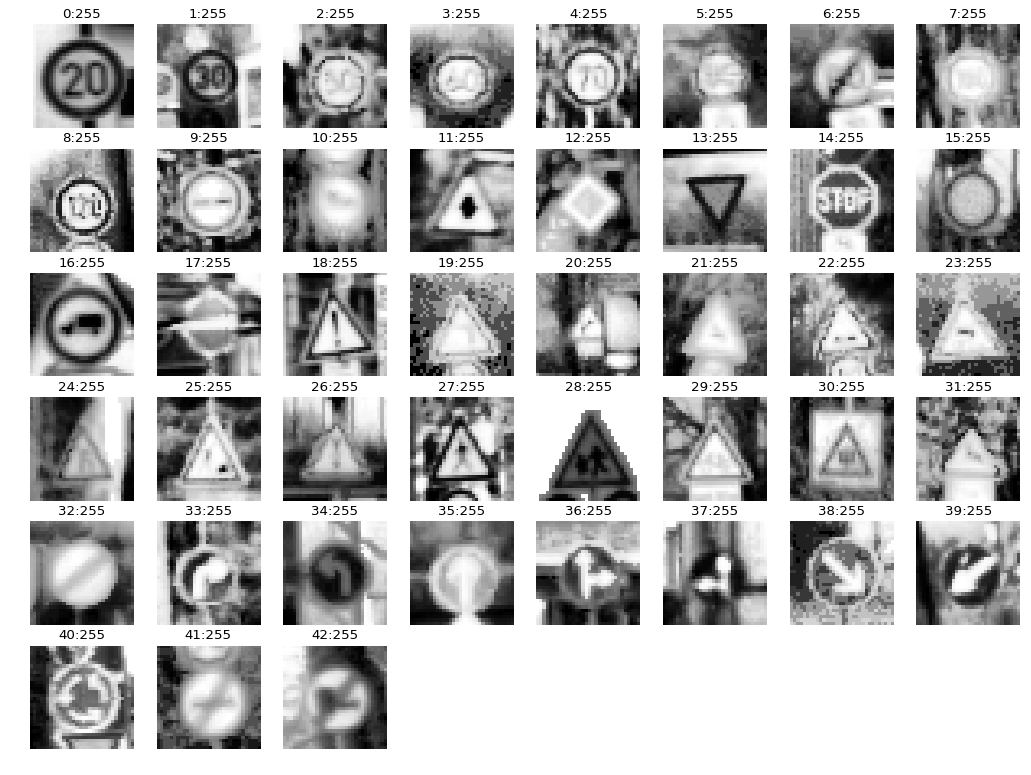

0 Speed limit (20km/h) (32, 32, 1) float64


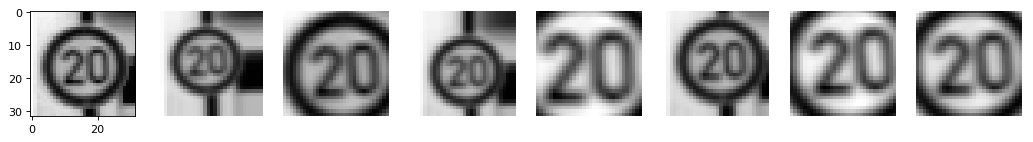

1 Speed limit (30km/h) (32, 32, 1) float64


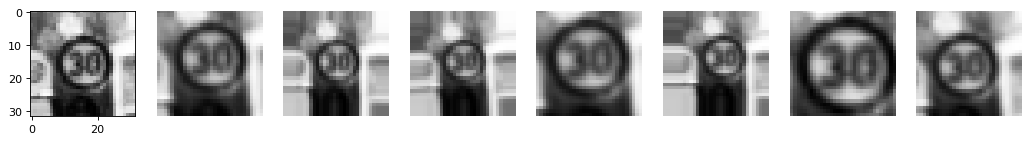

2 Speed limit (50km/h) (32, 32, 1) float64


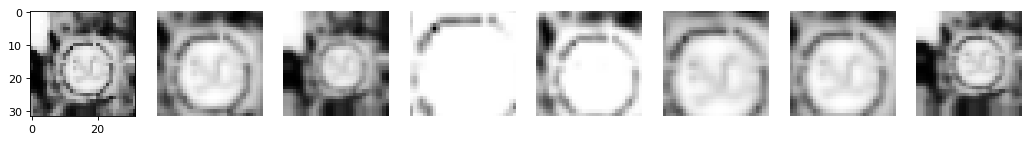

3 Speed limit (60km/h) (32, 32, 1) float64


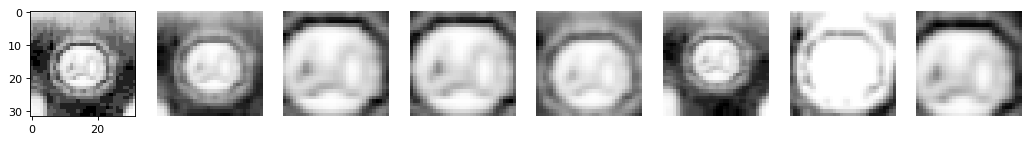

4 Speed limit (70km/h) (32, 32, 1) float64


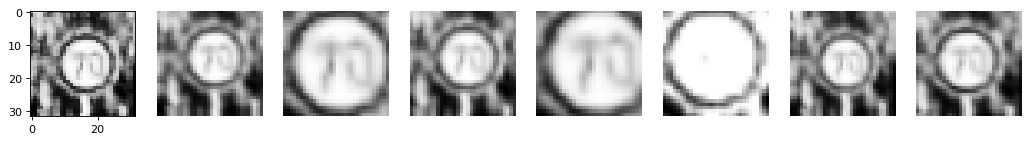

5 Speed limit (80km/h) (32, 32, 1) float64


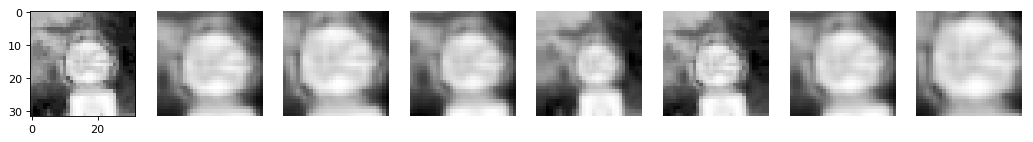

6 End of speed limit (80km/h) (32, 32, 1) float64


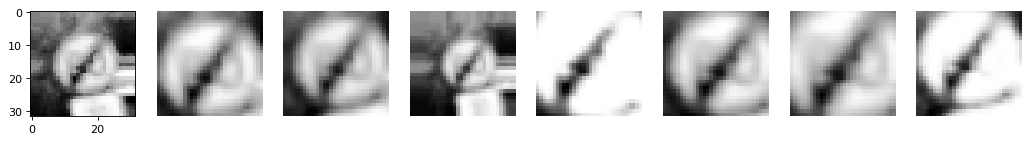

7 Speed limit (100km/h) (32, 32, 1) float64


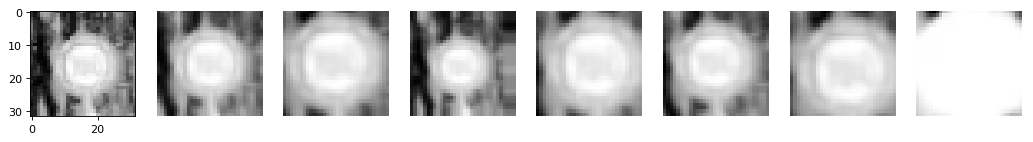

8 Speed limit (120km/h) (32, 32, 1) float64


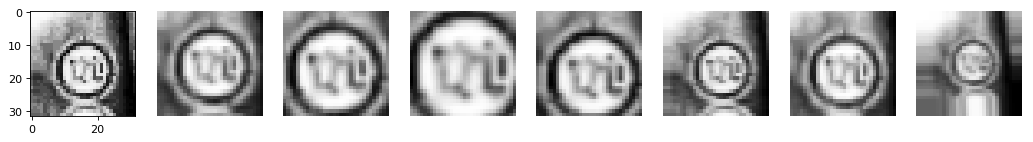

9 No passing (32, 32, 1) float64


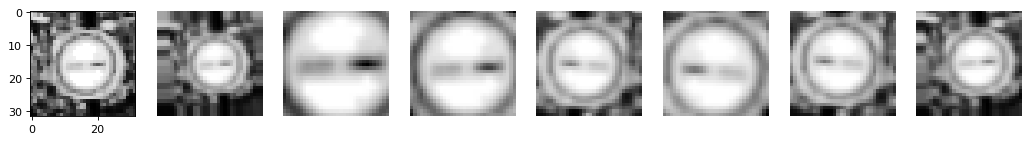

10 No passing for vehicles over 3.5 metric tons (32, 32, 1) float64


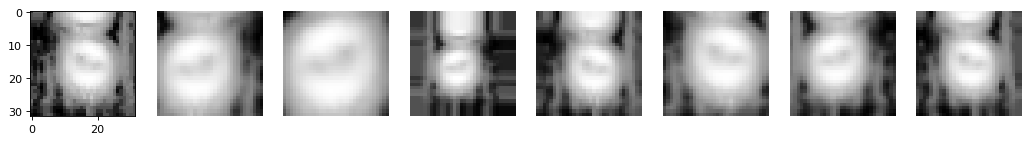

11 Right-of-way at the next intersection (32, 32, 1) float64


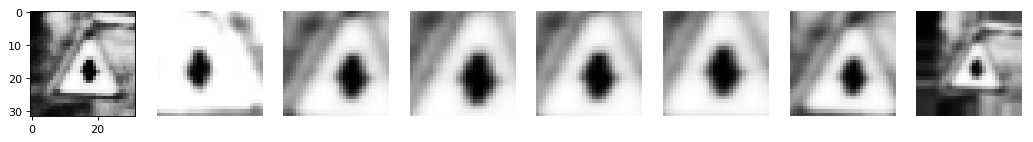

12 Priority road (32, 32, 1) float64


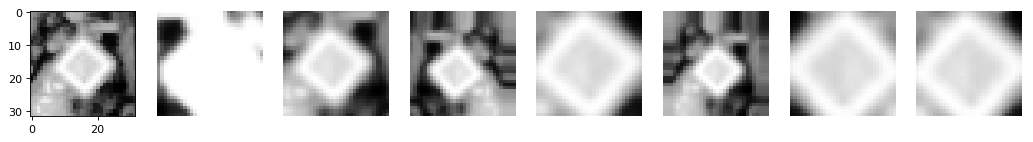

13 Yield (32, 32, 1) float64


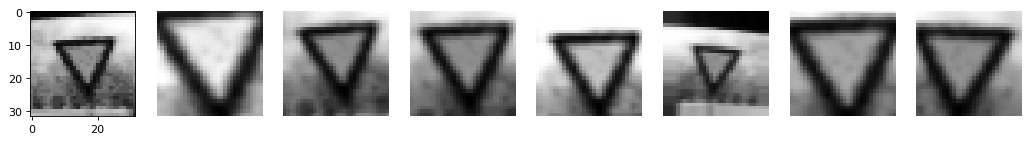

14 Stop (32, 32, 1) float64


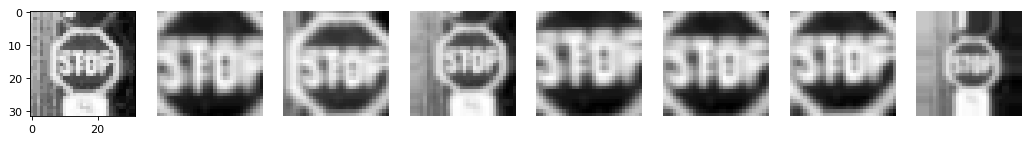

15 No vehicles (32, 32, 1) float64


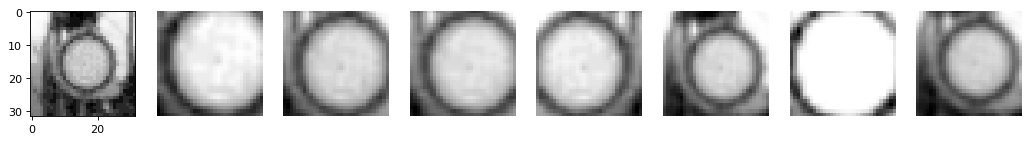

16 Vehicles over 3.5 metric tons prohibited (32, 32, 1) float64


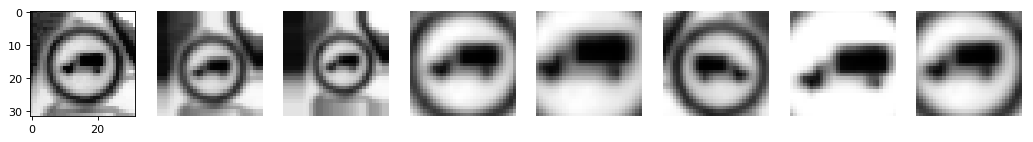

17 No entry (32, 32, 1) float64


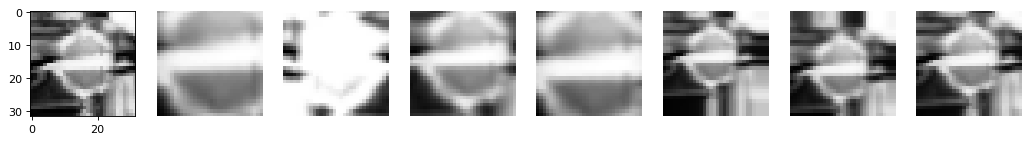

18 General caution (32, 32, 1) float64


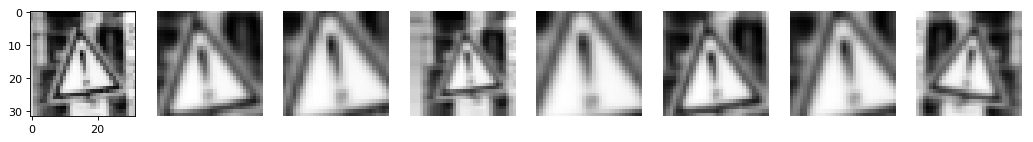

19 Dangerous curve to the left (32, 32, 1) float64


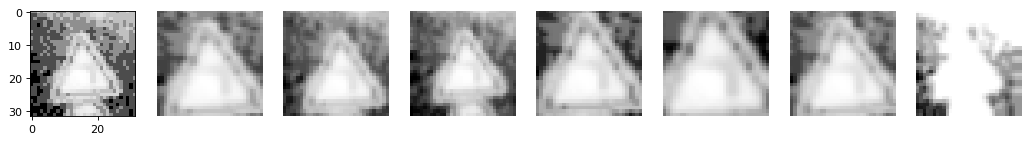

20 Dangerous curve to the right (32, 32, 1) float64


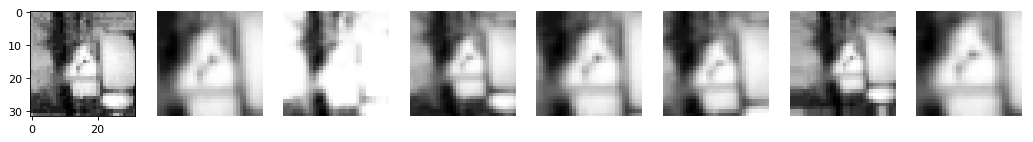

21 Double curve (32, 32, 1) float64


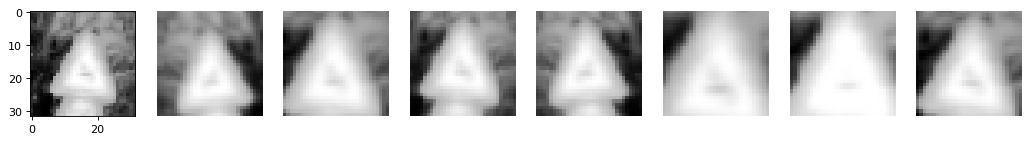

22 Bumpy road (32, 32, 1) float64


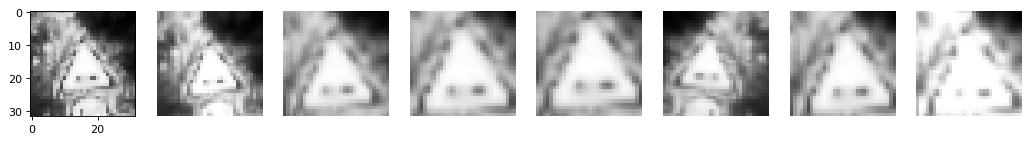

23 Slippery road (32, 32, 1) float64


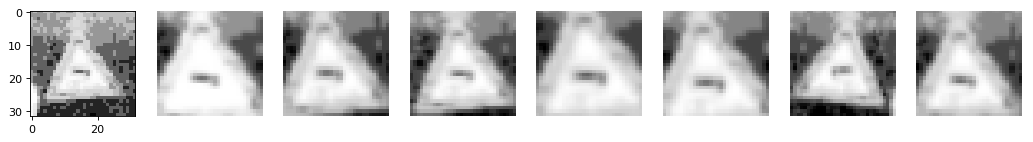

24 Road narrows on the right (32, 32, 1) float64


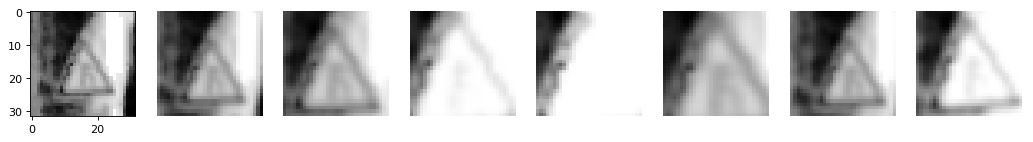

25 Road work (32, 32, 1) float64


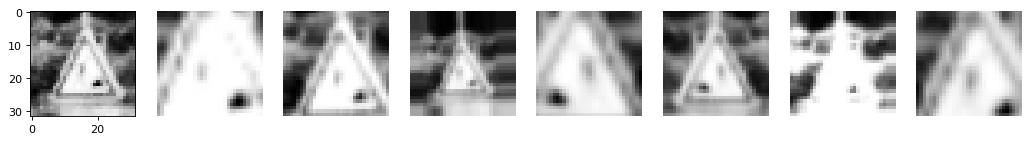

26 Traffic signals (32, 32, 1) float64


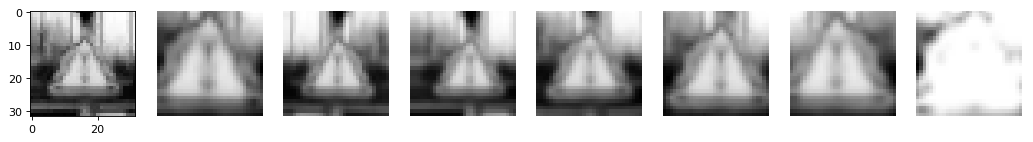

27 Pedestrians (32, 32, 1) float64


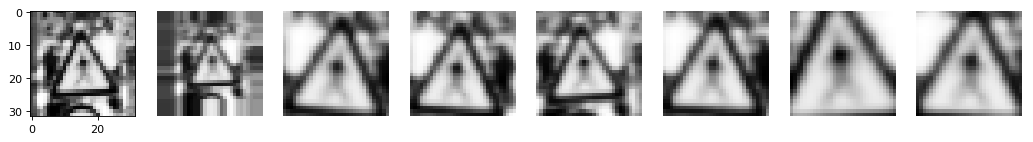

28 Children crossing (32, 32, 1) float64


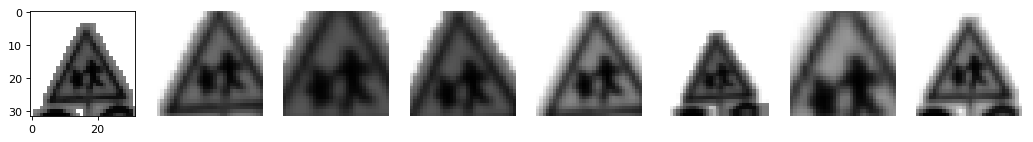

29 Bicycles crossing (32, 32, 1) float64


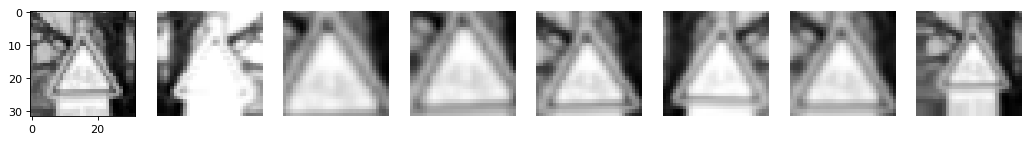

30 Beware of ice/snow (32, 32, 1) float64


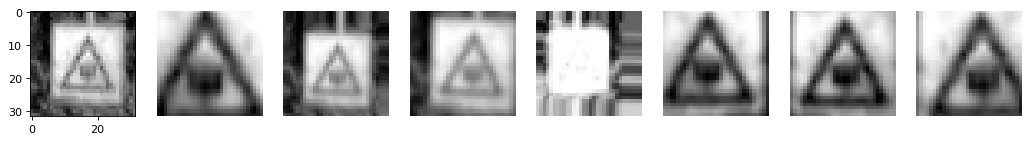

31 Wild animals crossing (32, 32, 1) float64


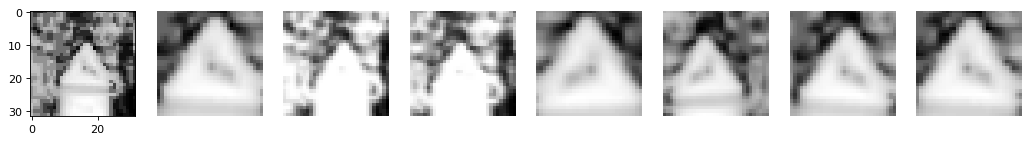

32 End of all speed and passing limits (32, 32, 1) float64


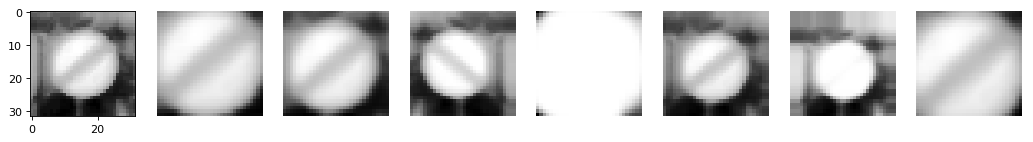

33 Turn right ahead (32, 32, 1) float64


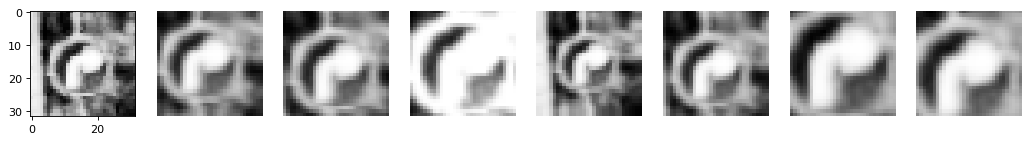

34 Turn left ahead (32, 32, 1) float64


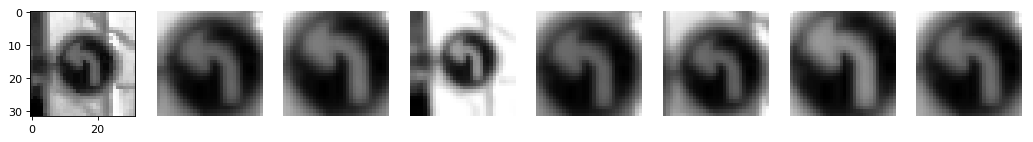

35 Ahead only (32, 32, 1) float64


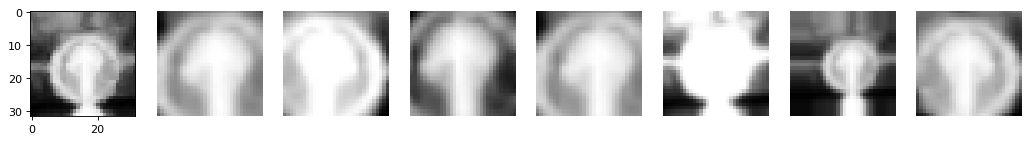

36 Go straight or right (32, 32, 1) float64


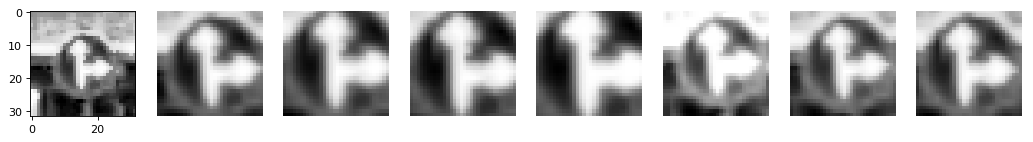

37 Go straight or left (32, 32, 1) float64


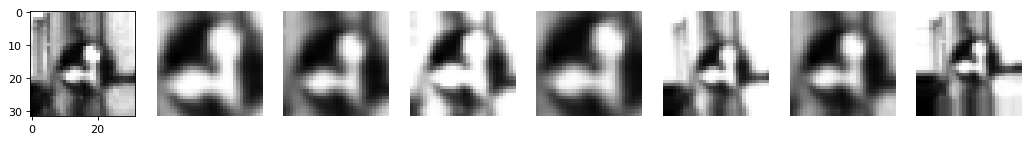

38 Keep right (32, 32, 1) float64


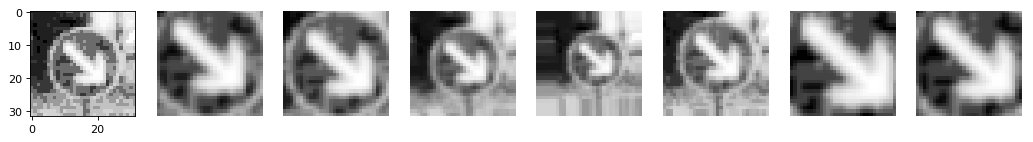

39 Keep left (32, 32, 1) float64


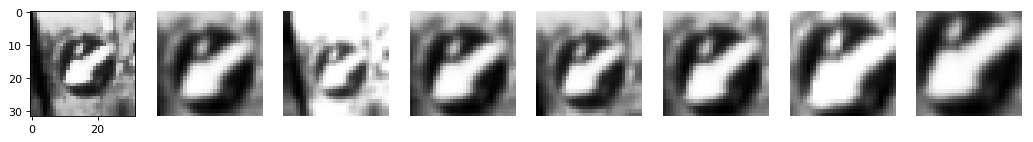

40 Roundabout mandatory (32, 32, 1) float64


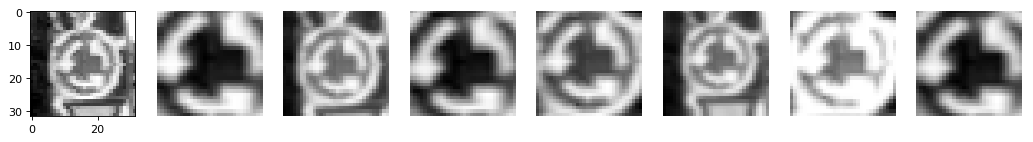

41 End of no passing (32, 32, 1) float64


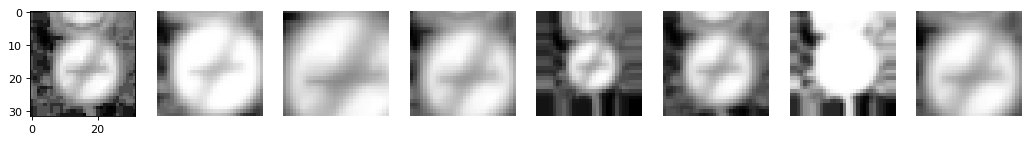

42 End of no passing by vehicles over 3.5 metric tons (32, 32, 1) float64


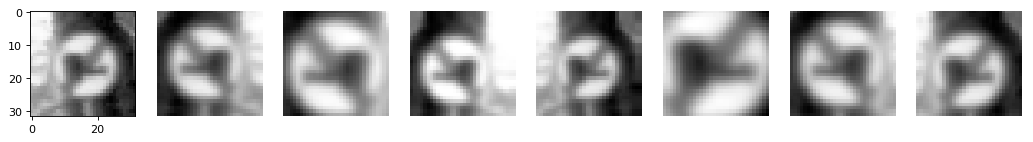

In [50]:
np.random.seed(1234)
# add augmented images, each class has at least 1000    
X_train3, y_train3, tr_num3=add_aug_images(X_train2, y_train2, 1000)
show_class_images(X_train3, y_train3, 1, name="Augmented Train", hist=0)
show_aug_images(X_train3, y_train3)


In [52]:
from sklearn.utils import shuffle

#X_train, y_train=shuffle(X_train2, y_train2)
X_train, y_train=shuffle(X_train3, y_train3)
print("Train data set image no: ", (X_train3.shape[0]))


Train data set image no:  51690


### Model Architecture

In [123]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 75
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

tf.reset_default_graph()
global conv1_W
global conv1_b
global conv2_W
global conv2_b
global fc1_W
global fc1_b
global fc2_W
global fc2_b
global fc3_W
global fc3_b

nn_spec1={"conv1":[5,5,1,6],
        "conv2":[5, 5, 6, 16],
        "fc1":[400,120],
        "fc2":[120,84],
        "fc3":[84,43]
        }
nn_spec2={"conv1":[5,5,1,8],
        "conv2":[5,5,8,16],
        "fc1":[400,128],
        "fc2":[128,256],
        "fc3":[256,43]
        }
nn_spec=nn_spec2

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=nn_spec["conv1"], mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(nn_spec["conv1"][3]), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=nn_spec["conv2"], mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(nn_spec["conv2"][3]), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0   = tf.nn.dropout(fc0, keep_prob)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=nn_spec["fc1"], mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(nn_spec["fc1"][1]), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=nn_spec["fc2"], mean = mu, stddev = sigma), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(nn_spec["fc2"][1]), name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2   = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=nn_spec["fc3"], mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(nn_spec["fc3"][1]), name='fc3_b')
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    layer_list = [conv1, conv2, fc0, fc1, fc2, logits]
    return layer_list

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [124]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
layer_list = LeNet(x,keep_prob)
[conv1, conv2, fc0, fc1, fc2, logits]=layer_list
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation,loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss/num_examples

In [125]:
import time
import operator

def get_time():
    t = time.time()
    return t
def train_process(target, iter, aug_size, bsize, prob, t_rate, restore):
    global saver
    global X_train
    global y_train
    
    np.random.seed(1234)
    acc_list=[]
    t0=get_time()
    log_name="train_log_"+str(aug_size)+".csv"
    fp = open(log_name,"w")
    with tf.Session() as sess:
        saver = tf.train.Saver()
        
        sess.run(tf.global_variables_initializer())
        if(restore==True):
            print("Loading variables from %s." % "./lenet")
            saver.restore(sess,"./lenet")
        else:
            print("Initialize variables")
            sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        print("Training...")
        print()
        print("EPOC, Time, Train Acc, Loss, Valid acc, Loss, Test Acc, Loss")
        fp.write("EPOC, Time, Train Acc, Loss, Valid acc, Loss, Test Acc, Loss\n")
        for i in range(iter):
            t1=get_time()
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, bsize):
                end = offset + bsize
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                batch_x, batch_y = gen_new_batch(batch_x, batch_y,aug_size)

                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, \
                                                        rate: t_rate, keep_prob: prob})

            train_accuracy, train_loss = evaluate(X_train, y_train)
            validation_accuracy, valid_loss = evaluate(X_valid, y_valid)
            test_accuracy, test_loss = evaluate(X_test, y_test)
            acc_list.append([train_accuracy,validation_accuracy, test_accuracy])
            t2=get_time()
            fp.write("%d, %.3f ,%.5f,%.3f, %.5f, %.3f, %.5f, %.3f, \n" \
                  %(i,(t2-t1), \
                    train_accuracy,train_loss,\
                      validation_accuracy, valid_loss,\
                      test_accuracy, test_loss))

            print("%d, %.3f ,%.5f,%.3f, %.5f, %.3f, %.5f, %.3f, " \
                  %(i,(t2-t1), \
                    train_accuracy,train_loss,\
                      validation_accuracy, valid_loss,\
                      test_accuracy, test_loss))
            if(validation_accuracy>target):
                #acc_list.append([train_accuracy,validation_accuracy, test_accuracy]*(iter-1-i))
                break
        saver.save(sess, './lenet')
        print("Model saved")
    fp.close()
    t2=get_time()
    print("Used %.2f min, epoc:%d, Final Eval/Valid/Test Accuarcy:%.5f, %.5f %.5f"\
          %((t2-t0)/60.0, len(acc_list), acc_list[-1][0],acc_list[-1][1],acc_list[-1][2]))

    return acc_list

In [127]:
target=0.99
iter=75
saver = tf.train.Saver()
acc_list=[]
aug_size=2
prob=0.80
t_rate = 0.0005
def print_train_info():
    print("Hyperparameters overview:")
    print("Maximum Epocs", iter)
    print("Traing rate:", t_rate)
    print("Target valid accuracy[stop once hit]:", target)
    print("Augmented Train Data Set size:",X_train.shape[0])
    print("Valid Data Set size:",X_valid.shape[0])
    print("Test Data Set size:",X_test.shape[0])
    print("[Augmented Train Data Set parameters]")
    print("Number of augmented image ratio during traing:", aug_size-1)
    for i in list(aug_spec.keys()):
        print (i, ":", aug_spec[i])
    ke=list(nn_spec.keys())
    print("[NN specification]")
    ke.sort()
    w=0
    n=0
    for i in ke:
        w=np.multiply.reduce(nn_spec[i])+nn_spec[i][-1]
        print (i, ":", nn_spec[i], ". Weights:", w)
        
    print("Keep Prob of FC1, FC2, FC3:", prob)

bsize=int(BATCH_SIZE/aug_size)



In [128]:
iter=75
aug_size=4
print_train_info ()
restore=False
acc_list1 = train_process(target,iter,aug_size, bsize, prob, t_rate, restore=restore)
acc_list.append(acc_list1)

Hyperparameters overview:
Maximum Epocs 75
Traing rate: 0.0005
Target valid accuracy[stop once hit]: 0.99
Augmented Train Data Set size: 51690
Valid Data Set size: 4410
Test Data Set size: 12630
[Augmented Train Data Set parameters]
Number of augmented image ratio during traing: 3
angle : 5
brightness : [0.9, 1.1]
tran : 4
scale : [0.75, 1.5]
[NN specification]
conv1 : [5, 5, 1, 8] . Nerons: 200 . Weights: 208
conv2 : [5, 5, 8, 16] . Nerons: 3200 . Weights: 3216
fc1 : [400, 128] . Nerons: 128 . Weights: 51328
fc2 : [128, 256] . Nerons: 256 . Weights: 33024
fc3 : [256, 43] . Nerons: 43 . Weights: 11051
Keep Prob of FC1, FC2, FC3: 0.8
Initialize variables
Training...

EPOC, Time, Train Acc, Loss, Valid acc, Loss, Test Acc, Loss
0, 153.204 ,0.76160,0.844, 0.76077, 0.771, 0.74695, 0.847, 
1, 152.424 ,0.86558,0.516, 0.86304, 0.481, 0.85131, 0.549, 
2, 152.633 ,0.90600,0.368, 0.89161, 0.372, 0.88282, 0.438, 
3, 152.780 ,0.92803,0.288, 0.92109, 0.294, 0.89644, 0.376, 
4, 152.331 ,0.93792,0.24

In [129]:
var_list=["conv1_W", "conv1_b", "conv2_W","conv2_b", "fc1_W", "fc2_W", "fc3_W","fc1_b", "fc2_b", "fc3_b"]
#var_list=["conv1_W", "conv1_b", "conv2_W","conv2_b", "fc1_W", "fc2_W", "fc3_W"]
def restore_tensor(checkpoint_file='./lenet'):
    tensor_list={}
    with tf.Session() as session:
        saver = tf.train.Saver()
        saver.restore(session, checkpoint_file)
        #print(session.run(tf.global_variables()))
        
        for i in var_list:
            n=i+":0"
            t = session.graph.get_tensor_by_name(n)
            #print("Saved TF var:", t.name, "Mean/Std:",np.mean(t.eval()),np.std(t.eval()))
            tensor_list[i]=t
            #print (t)
    return tensor_list

def reset():
    tf.reset_default_graph()
#reset()
res_tensor=restore_tensor()
#inspect_checkpoint --file_name='./lenet'


Test Accuracy and Loss = 0.964, 0.135
             precision    recall  f1-score   support

          0       0.90      0.93      0.92        60
          1       0.98      0.97      0.98       720
          2       0.96      0.99      0.97       750
          3       0.94      0.97      0.96       450
          4       0.97      0.97      0.97       660
          5       0.96      0.93      0.95       630
          6       0.99      0.86      0.92       150
          7       0.98      0.95      0.97       450
          8       0.94      0.98      0.96       450
          9       1.00      0.98      0.99       480
         10       0.98      0.98      0.98       660
         11       0.98      0.94      0.96       420
         12       0.99      0.99      0.99       690
         13       1.00      1.00      1.00       720
         14       1.00      0.97      0.98       270
         15       0.97      0.98      0.98       210
         16       0.99      1.00      1.00       150
       

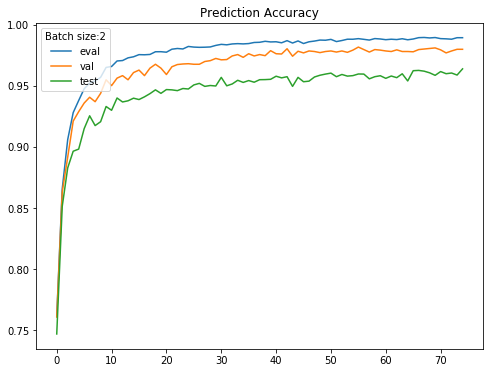

In [133]:
from sklearn.metrics import classification_report

def predict(X_data):
    sess = tf.get_default_session()
    res = sess.run(tf.argmax(logits,1), feed_dict={x: X_data, keep_prob:1.0})
    return res 
def plot_curve(curves,T):
    lab=["eval","val","test"]
    bsize=[2,4,8,1]
    plt.figure(figsize=(8,6))
    plt.title("Prediction Accuracy")
    for i in range(len(curves)):
        curve=curves[i]
        x=range(len(curve))
        c1=np.array(curve)
        title=T+str(bsize[i])
        plt.subplot(1,len(curves),i+1)
        for k in range(3):
            plt.plot(x,c1[:,k],linestyle="-", label=lab[k])
        plt.legend(loc='upper left',title=title)
    plt.show()    

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver = tf.train.Saver()
    saver.restore(sess, './lenet')
    test_accuracy, test_loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    valid_accuracy, valid_loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: X_valid, y: y_valid, keep_prob: 1.0})
    train_accuracy, train_loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: X_train, y: y_train, keep_prob: 1.0})
    predictions=predict(X_test)
    expected=y_test
    rept = classification_report(expected, predictions)
    print("Test Accuracy and Loss = %.3f, %.3f"%(test_accuracy, test_loss))
    print (rept)

    predictions=predict(X_valid)
    expected=y_valid

    rept = classification_report(expected, predictions)
    print("valid Accuracy and loss = %.3f, %.3f"%(valid_accuracy,valid_loss ))
    print (rept)

    predictions=predict(X_train)
    expected=y_train

    rept = classification_report(expected, predictions)
    print("Train Accuracy and loss = %.3f, %.3f"%(train_accuracy,train_loss ))
    print (rept)

plot_curve(acc_list,"Batch size:")

    

In [131]:
import tensorflow as tf

saver = tf.train.Saver()
print("Check Train/Valid/Test Accuarcy for each class")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accs=[]
    lab=["Train","Valid","Test"]
    for k in range(3):
        accs1=[]
        X_in, y_in=[[X_train,y_train],[X_valid,y_valid],[X_test,y_test]][k]
        for i in range(43):
            XX,yy=get_data_set(X_in, y_in, i,0)
            size=len(XX)
            pred_res = predict(XX[:size])
            acc=(pred_res==i).sum()
            accs1.append(acc*1.0/size)
        #print(accs1)
        accs.append(accs1)
print ("Done")

Check Train/Valid/Test Accuarcy for each class
Done


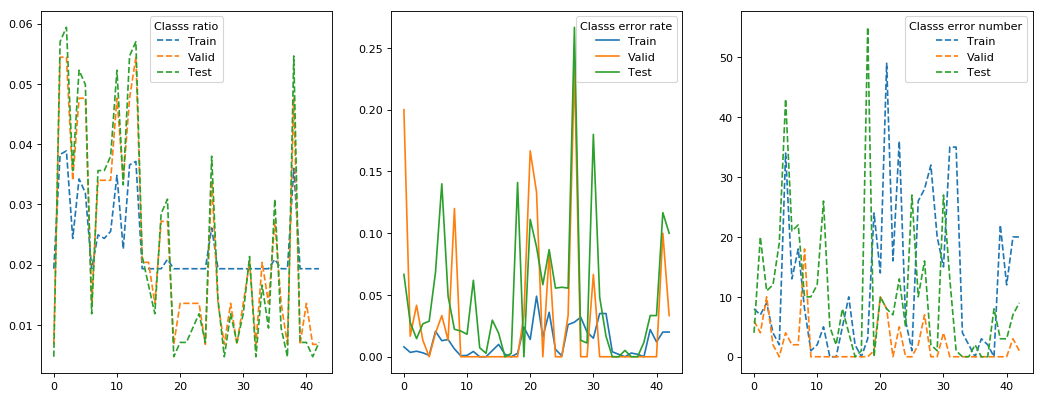

In [132]:
def get_class_size():
    cs=[]
    for k in range(3):
        cs1=[]
        X_in, y_in=[[X_train,y_train],[X_valid,y_valid],[X_test,y_test]][k]
        for i in range(43):
            XX,yy=get_data_set(X_in, y_in, i,0)   
            cs1.append(len(XX))
        cs.append(cs1)
    return cs

cs=get_class_size()

plt.figure(dpi=80,figsize=(8*2, 6))
plt.subplot(1,3,1)
for k in range(len(accs)):
    accs1=np.array(accs[k])
    cs1=np.array(cs[k],dtype="float32")
    cn1=cs1/cs1.sum()
    plt.plot(range(len(accs1)),cn1,linestyle="--", label=lab[k])
plt.legend(title="Classs ratio")

plt.subplot(1,3,2)
for k in range(len(accs)):
    accs1=np.array(accs[k])
    err1=1.0-accs1
    plt.plot(range(len(accs1)),err1,linestyle="-", label=lab[k])
    
plt.legend(title="Classs error rate")

plt.subplot(1,3,3)
for k in range(len(accs)):
    accs1=np.array(accs[k])
    cs1=np.array(cs[k],dtype="float32")
    cn1=(1-accs1)*cs1
    plt.plot(range(len(accs1)),cn1,linestyle="--", label=lab[k])
plt.legend(title="Classs error number")
plt.savefig("class_error.png")
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [134]:
def resize_img(img):
    pad=5
    img=mpimg.imread("examples/test0.jpg")
    img=cv2.copyMakeBorder(img, pad,pad,pad,pad,cv2.BORDER_CONSTANT, value=0)  
    plt.imshow(img)
    plt.show()
    img=cv2.resize(img,(32,32))
    plt.imshow(img)
    plt.show()
    mpimg.imsave("examples/test7.jpg",img)
    
    return img

Web images


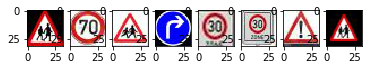

In [135]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
num=8
X_t1=[]
y_t1=[]
if (1):
    y_t1=[28,4,28,33,1,1,18,28]
    print("Web images")
    for i in range(num):
        n="examples/test"+str(i)+".jpg"
        img=mpimg.imread(n)
        plt.subplot(1,num,i+1)
        plt.imshow(img)
        X_t1.append(np.copy(img))
else:
    fp=open("tri_image.txt")
    lines=fp.readlines()
    for i in lines:
        li=re.search(r'class_(.*?)_(.*?).jpg',i.strip())
        cl=li.group(1)
        img=mpimg.imread(i.strip())
        X_t1.append(np.copy(img))
        y_t1.append(int(cl))
plt.show()   


### Predict the Sign Type for Each Image

Normalized images
Mean/Max/Min: -0.0416685814951 1.0 -1.0


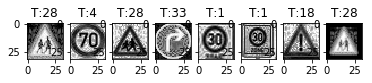

Train examples


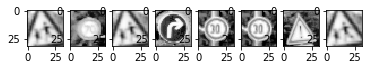

In [136]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

X_t=norm_image(X_t1,1, 1)
y_t=np.copy(y_t1)
print("Normalized images")
print("Mean/Max/Min:", np.mean(X_t), np.max(X_t), np.min(X_t))
for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title("T:"+str(y_t[i]))
    plt.imshow(denorm_image(X_t[i],1,1))
plt.show()   
print("Train examples")
for i in range(num):
    plt.subplot(1,num,i+1)
    tr_list=np.argwhere(y_t[i]==y_train).flatten()
    xx=X_train[tr_list[10]]
    yy=y_train[tr_list[10]]
    plt.imshow(denorm_image(xx,1,1))
plt.show()   
    

In [137]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import tensorflow as tf

saver = tf.train.Saver()
print("Check Prediction Accuarcy")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred_res = predict(X_t)
    t = (pred_res == y_t).sum()
    print("Predictions:",pred_res)
    print("Actural:",y_t)
    print("Accuracy:",t/len(X_t))
print ("Done")

Check Prediction Accuarcy
Predictions: [28  4 28 33  1  2 18 28]
Actural: [28  4 28 33  1  1 18 28]
Accuracy: 0.875
Done


### Analyze Performance

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [138]:
def get_softmax(X):
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        sm=tf.nn.softmax(logits)
        a=sess.run(sm, feed_dict={x:X, keep_prob:1.0})
        ret=sess.run(tf.nn.top_k(tf.constant(a), k=5)) 
    return ret, a


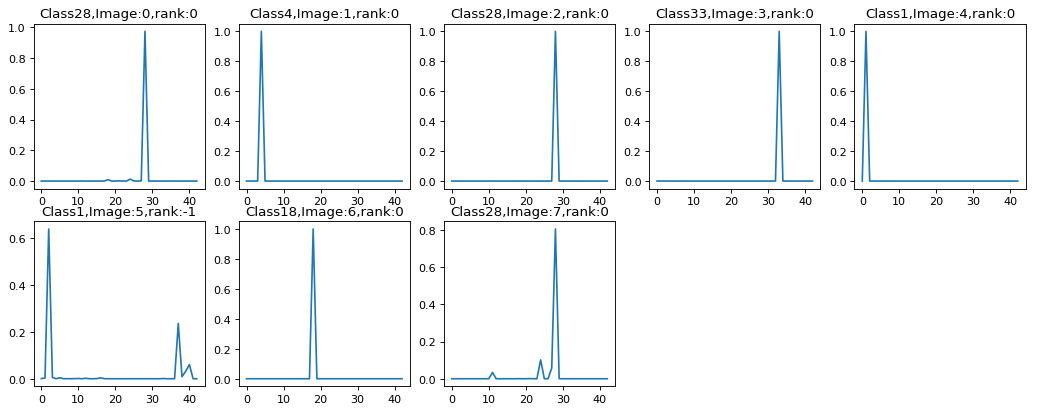

In [141]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    (m,n), a=get_softmax(X_t[:8])
plt.figure(figsize=(16,6),dpi=80)
# print Class, image no, the rank in the softmax output
# rank=-1 means it is not in the top 5 choices. rank=0 means it has max possibility.
for i in range(len(a)):
    plt.subplot(2,5,i+1)
    try:
        rank=n[i].tolist().index(y_t[i])
    except:
        rank=-1
    #print (rank)
    plt.title("Class"+str(y_t[i])+",Image:"+str(i)+",rank:"+str(rank))
    plt.plot(range(len(a[i])), a[i])
plt.show()


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [156]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    for i in range(len(image_input)):
        plt.figure(plt_num, figsize=(15,15), dpi=80)
        for featuremap in range(featuremaps):
            vmin = np.min(activation[i,:,:,featuremap])
            vmax = np.max(activation[i,:,:,featuremap])
            #print (vmin, vmax)
            plt.subplot(6,10, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.axis("off")
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.subplot(6,10, featuremap+2) # sets the number of feature maps to show on each row and column
        #plt.title(str(i)+': Original Image') # displays the feature map number
        plt.imshow(image_input[i].squeeze(), cmap="gray")
        plt.show()

In [160]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
conv1_W=t_list["conv1_W"]
conv1_b=t_list["conv1_b"]
conv1_c   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
# SOLUTION: Activation.
conv1_r = tf.nn.relu(conv1_c)
# SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1_r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = t_list["conv2_W"]
conv2_b = t_list["conv2_b"]
conv2_c   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# SOLUTION: Activation.
conv2_r = tf.nn.relu(conv2_c)

# SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2_r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
# SOLUTION: Flatten. Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)
fc1_W = t_list["fc1_W"]
fc1_b = t_list["fc1_b"]
fc1   = tf.matmul(fc0, fc1_W) + fc1_b
# SOLUTION: Activation.
fc1    = tf.nn.relu(fc1)

# SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W = t_list["fc2_W"]
fc2_b = t_list["fc2_b"]
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)
fc3_W = t_list["fc3_W"]
fc3_b = t_list["fc3_b"]

# SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
logits = tf.matmul(fc2, fc3_W) + fc3_b



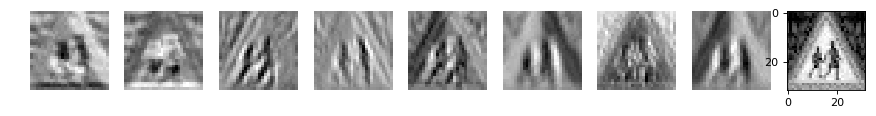

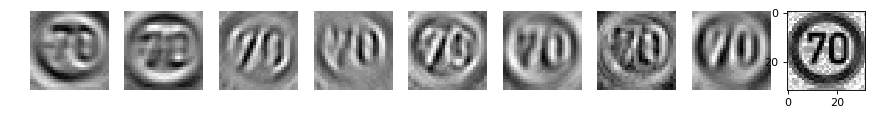

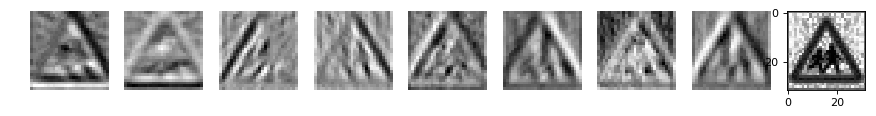

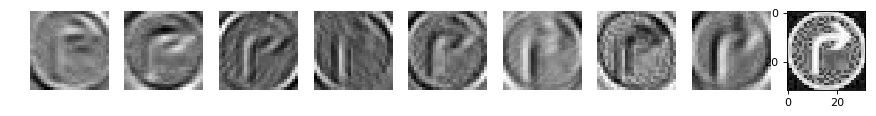

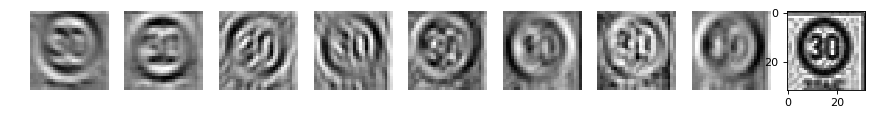

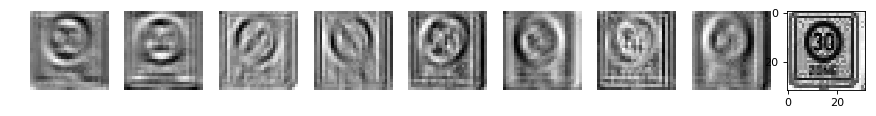

In [161]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    outputFeatureMap(img, conv1_c)#,activation_min=-5, activation_max=5 )

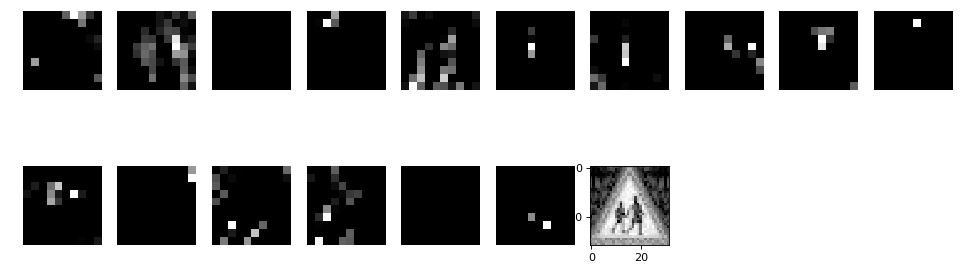

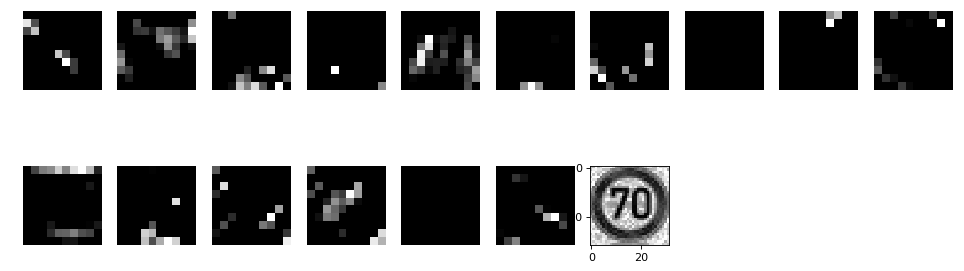

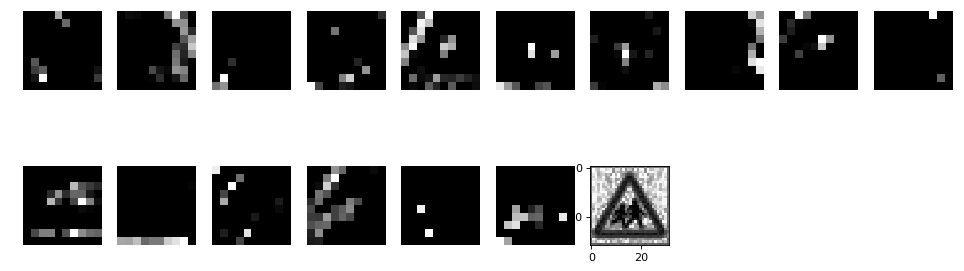

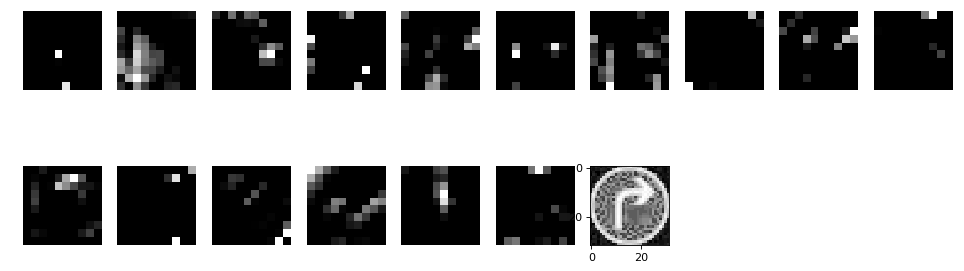

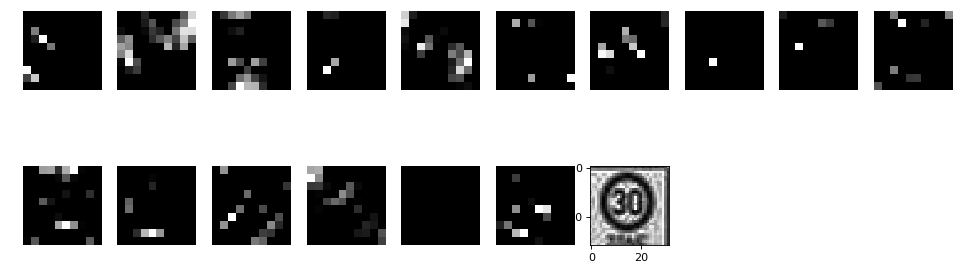

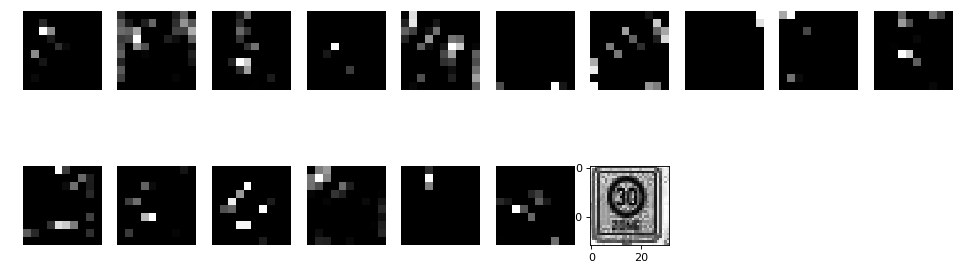

In [163]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    outputFeatureMap(img, conv2_r)#,activation_min=0, activation_max=5 )

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 